<a href="https://colab.research.google.com/github/sabinamunoz/lab-comparing-regression-models/blob/master/lab_comparing_regression_models_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab | Comparing regression models



In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)

In [ ]:
customer_df = pd.read_csv('/content/drive/MyDrive/IronHack Bootcamp/UNIT 4/we_fn_use_c_marketing_customer_value_analysis (1).csv')
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.head()
len(customer_df.index)

9134

In [ ]:
customer_df = customer_df.drop('customer', axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes('object')
display(numerical_df.head(), categorical_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


state


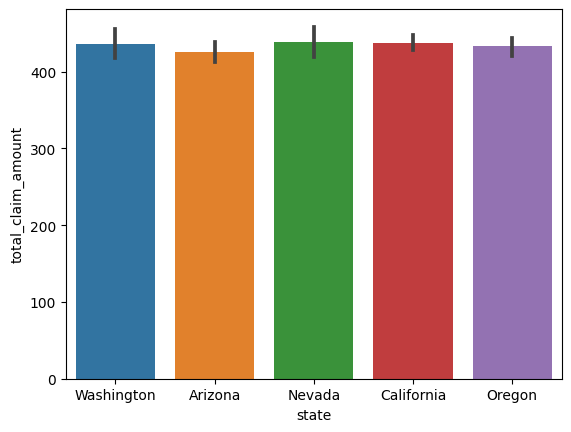

response


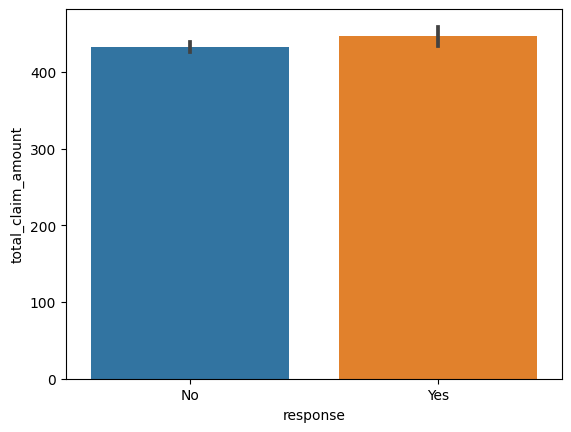

coverage


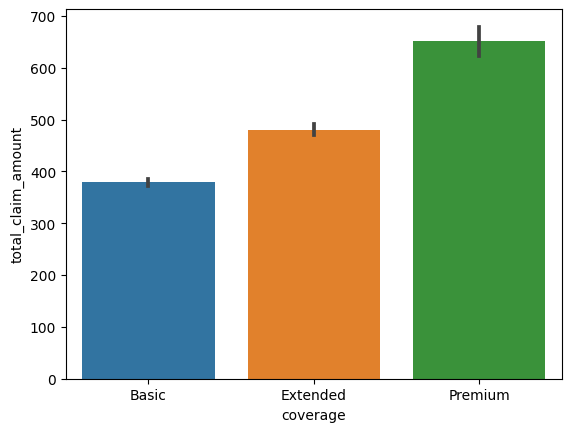

education


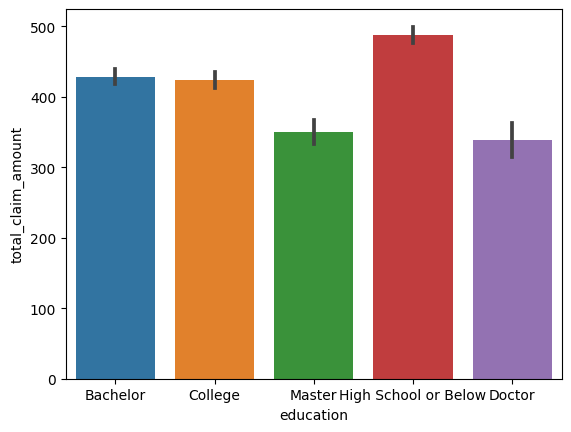

effective_to_date


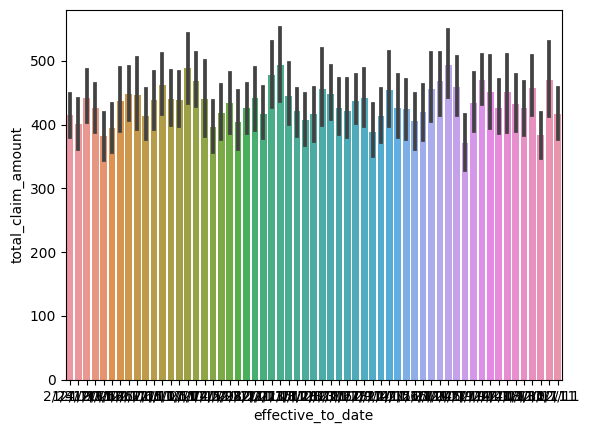

employmentstatus


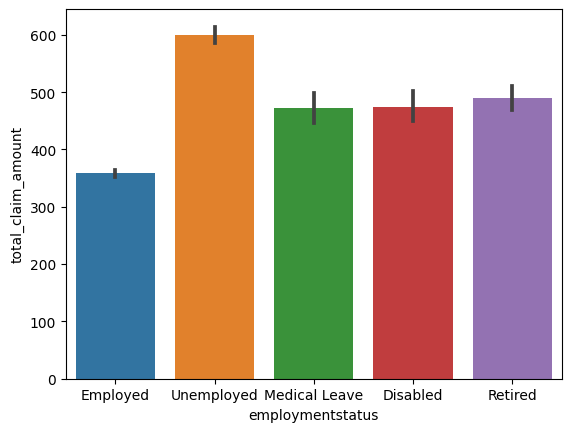

gender


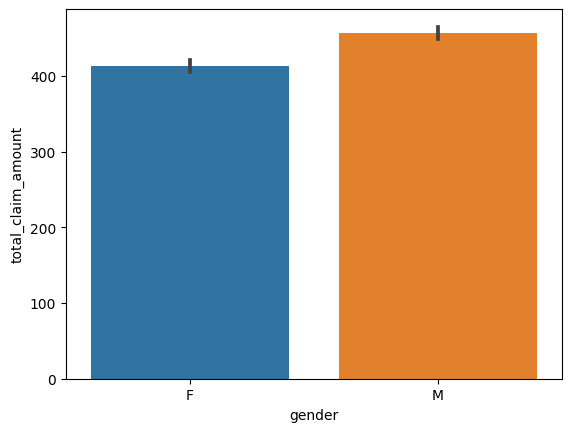

location_code


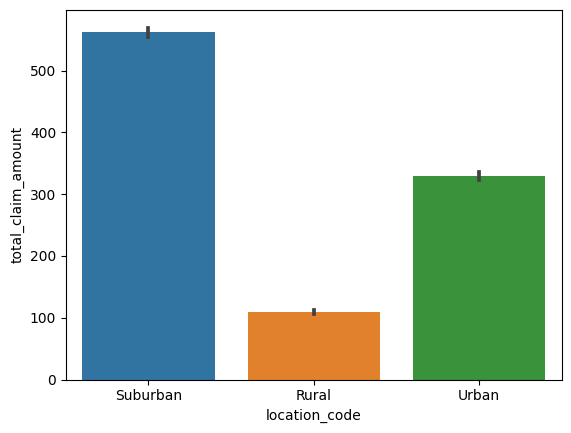

marital_status


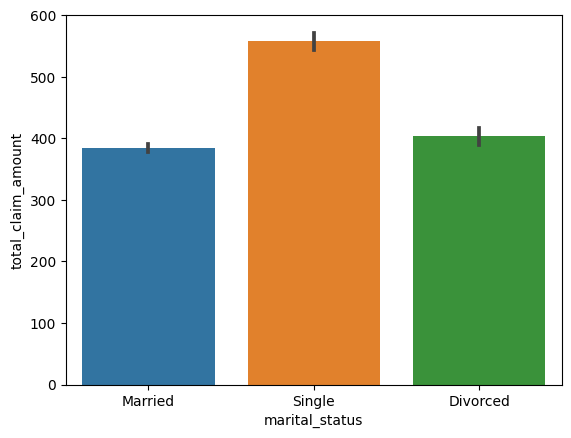

policy_type


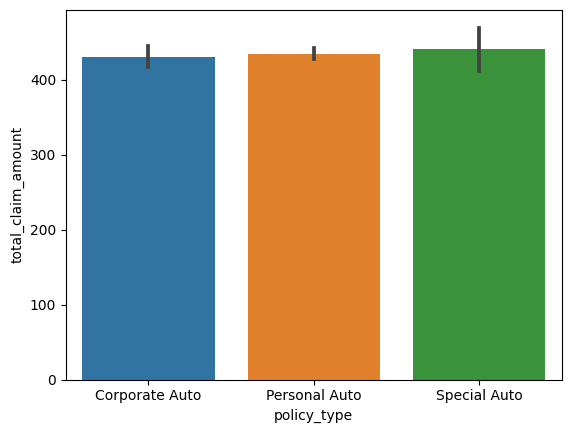

policy


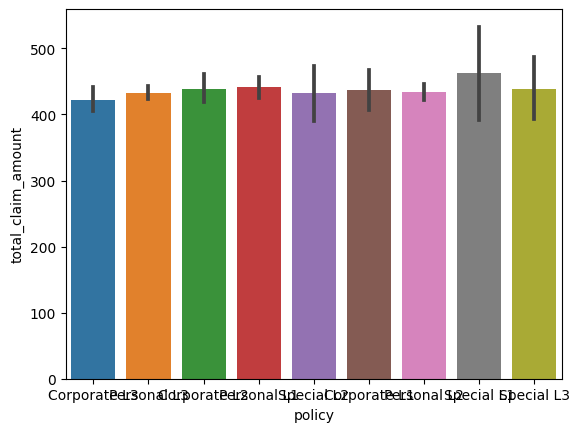

renew_offer_type


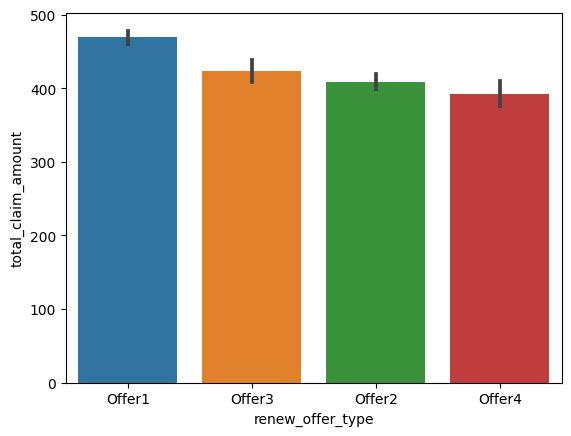

sales_channel


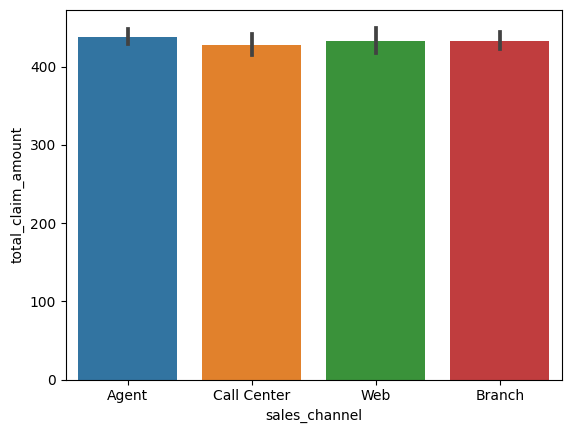

vehicle_class


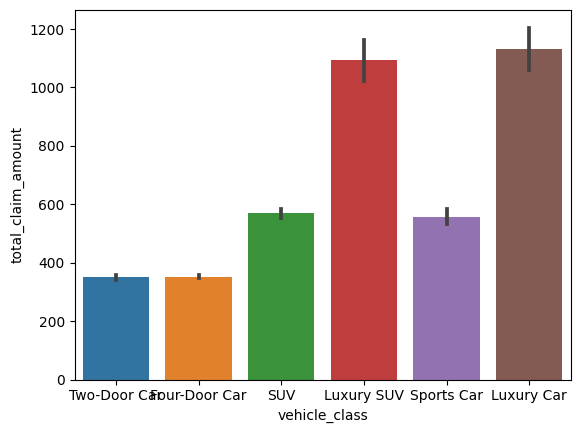

vehicle_size


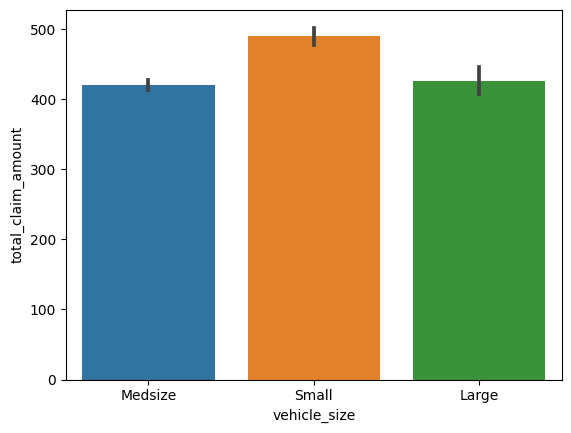

In [ ]:
for col in categorical_df:
    print(col)
    sns.barplot(data=customer_df, x=col, y='total_claim_amount')
    plt.show()

In [ ]:
for col in categorical_df:
    print(customer_df[col].value_counts())
    print()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     1

In [ ]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [ ]:
customer_df['policy'] = customer_df['policy'].str[-2:]
customer_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [ ]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize


state


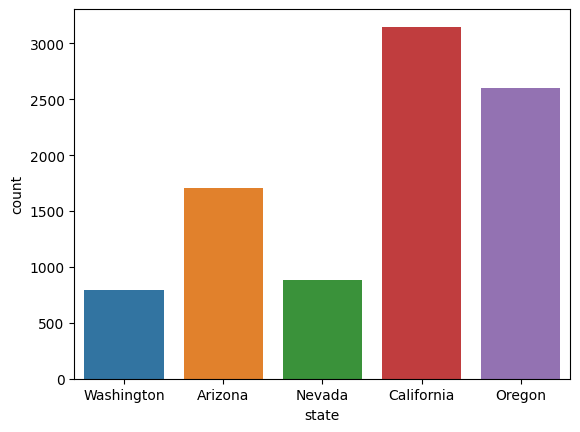

response


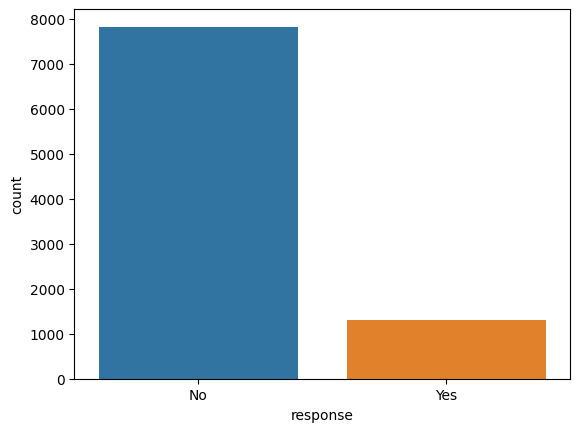

coverage


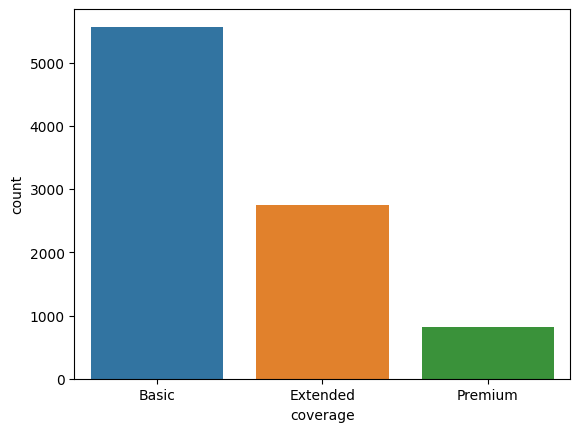

education


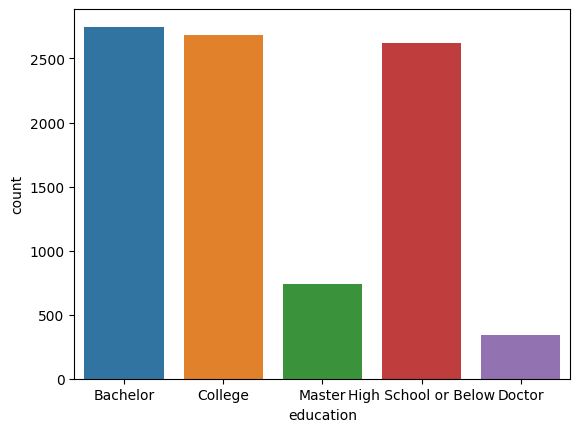

employmentstatus


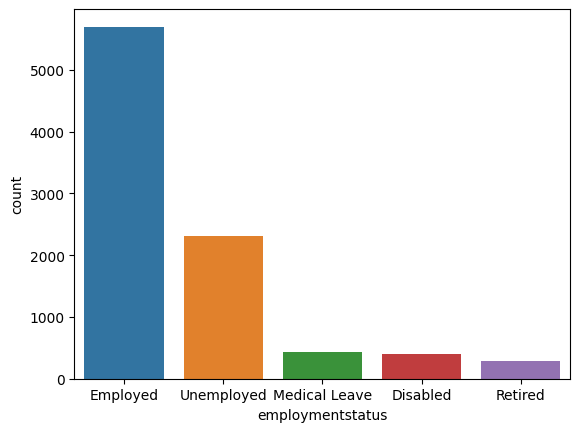

gender


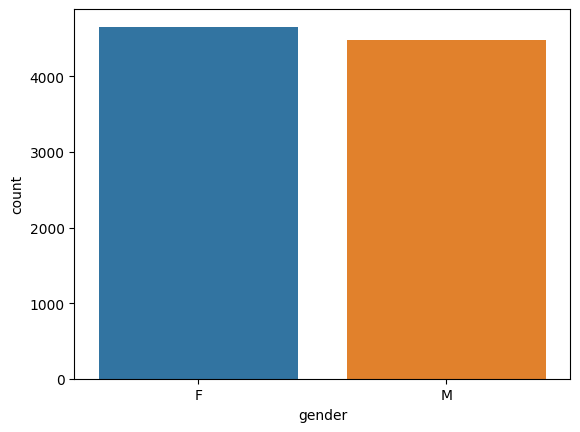

location_code


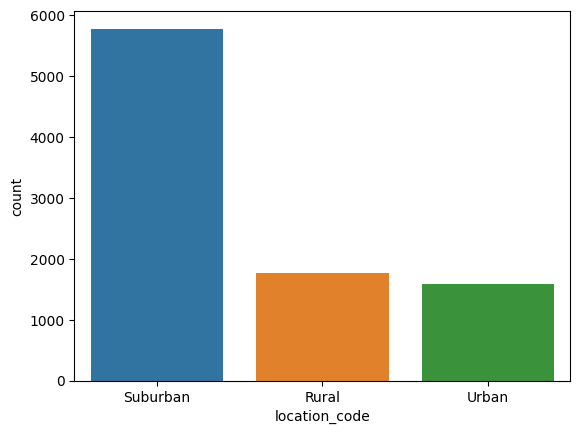

marital_status


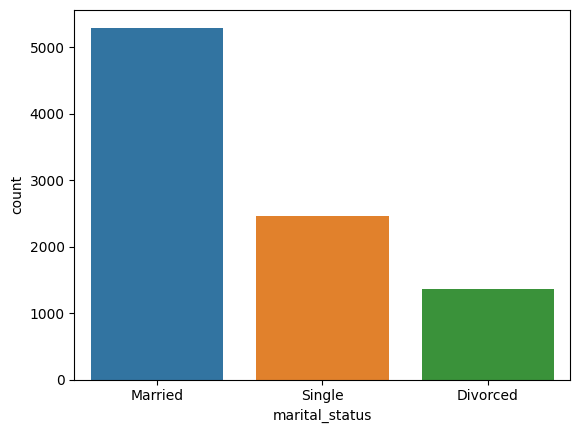

policy_type


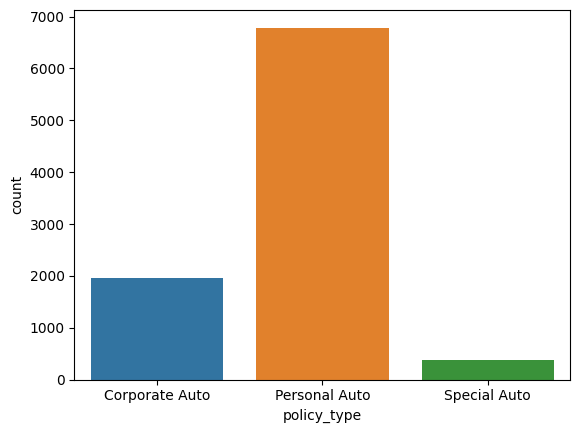

policy


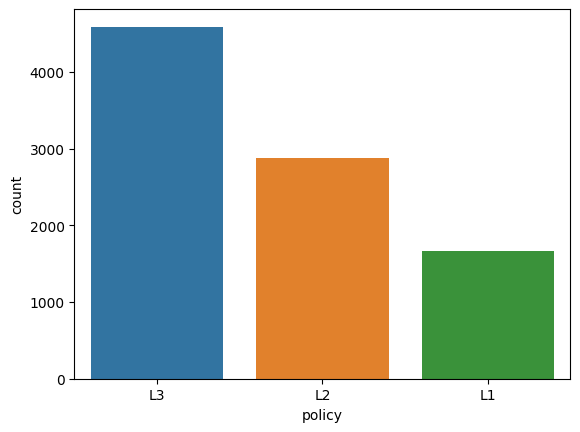

renew_offer_type


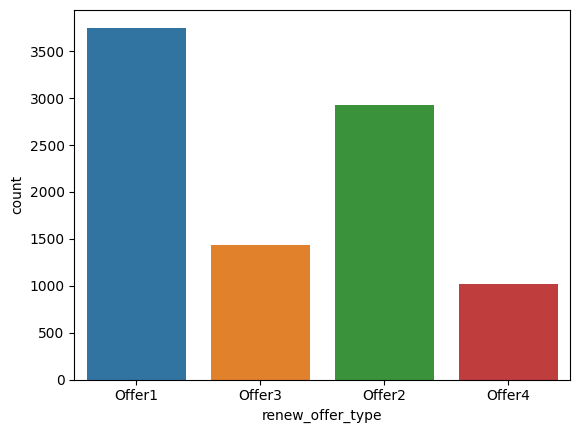

sales_channel


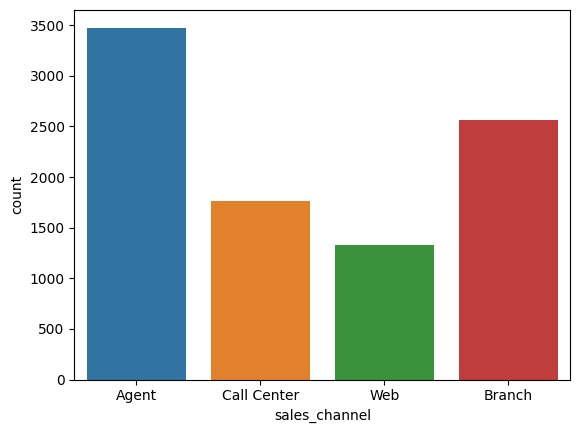

vehicle_class


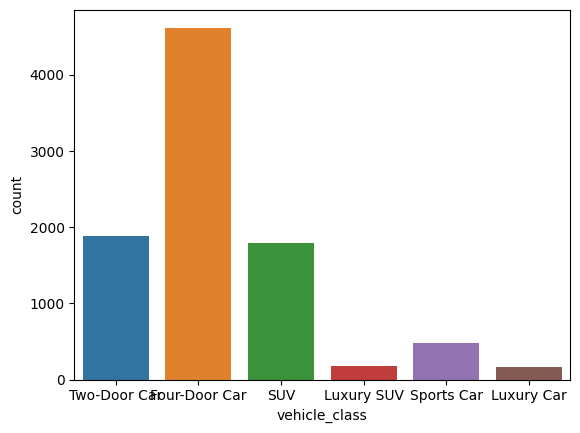

vehicle_size


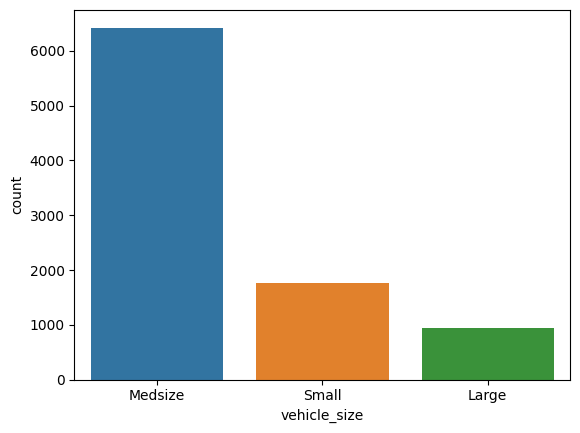

In [ ]:
for col in categoricals:
    print(col)
    sns.countplot(data=customer_df, x=col)
    plt.show()

state


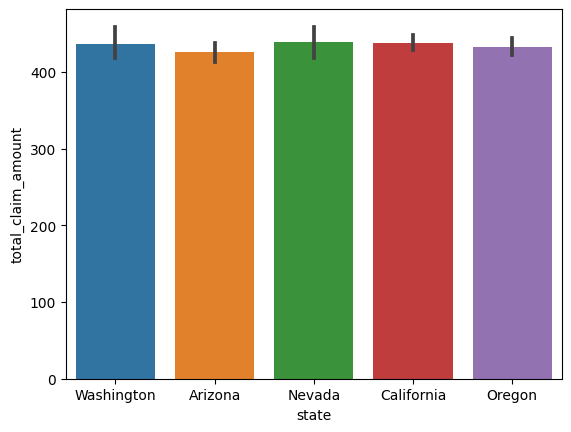

response


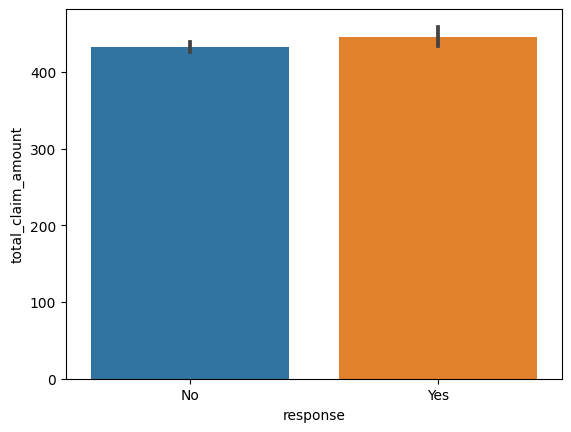

coverage


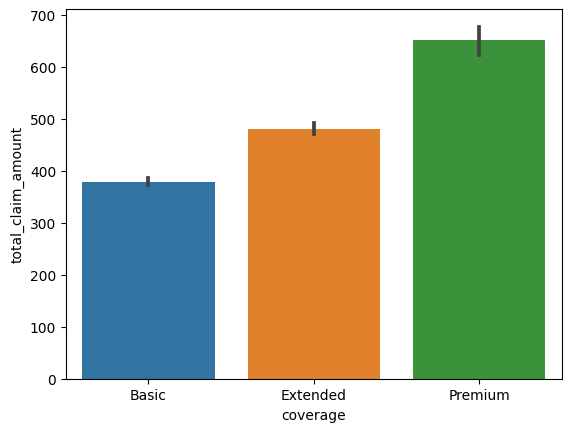

education


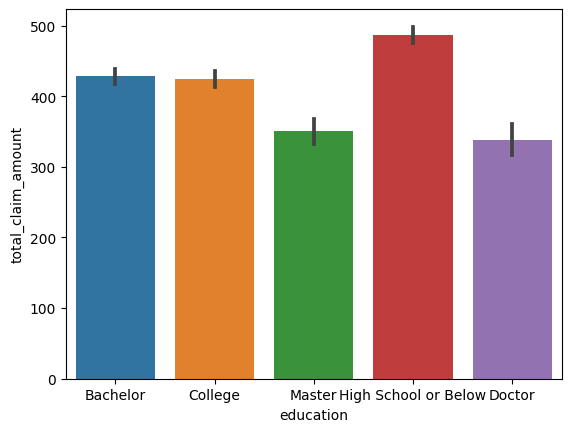

employmentstatus


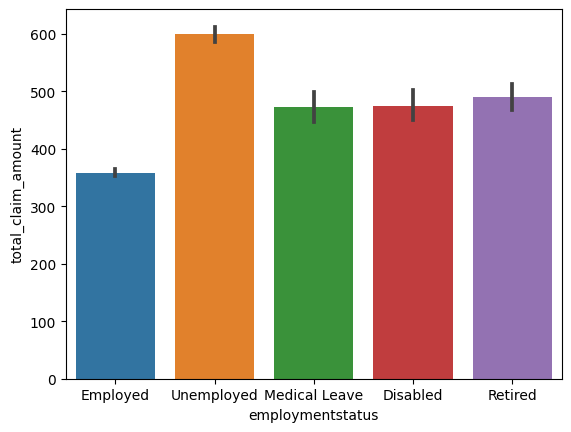

gender


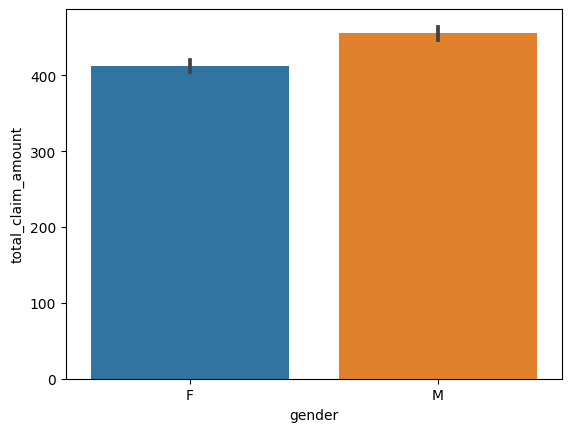

location_code


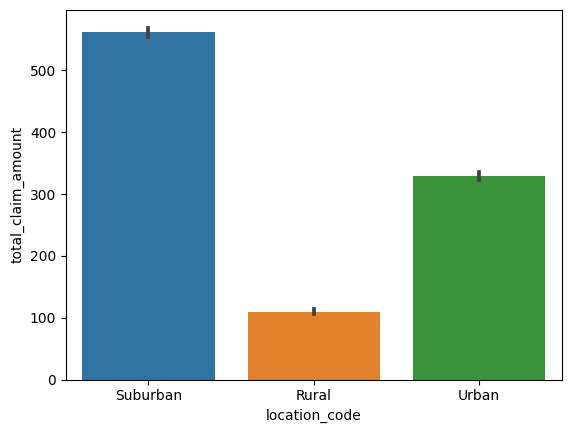

marital_status


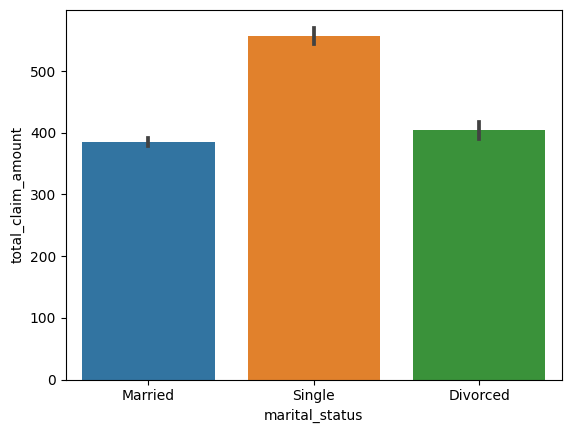

policy_type


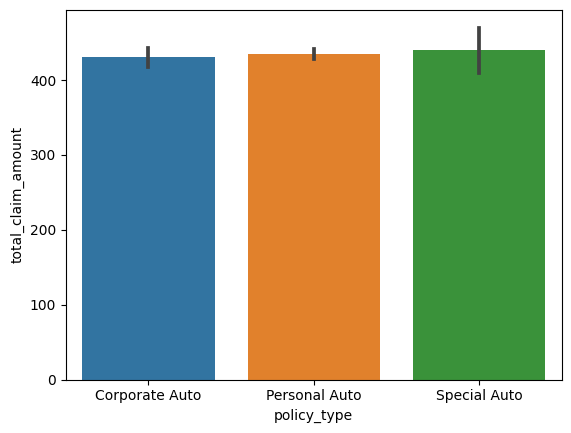

policy


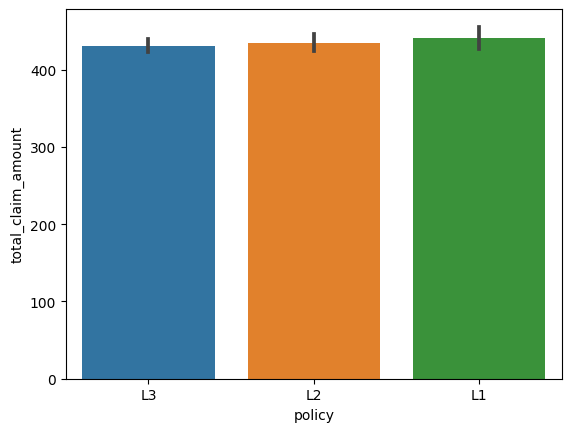

renew_offer_type


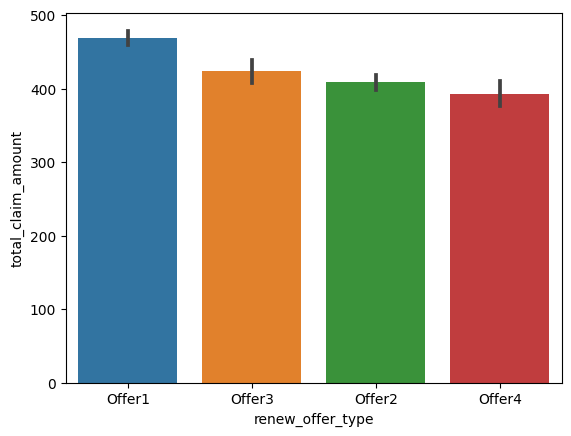

sales_channel


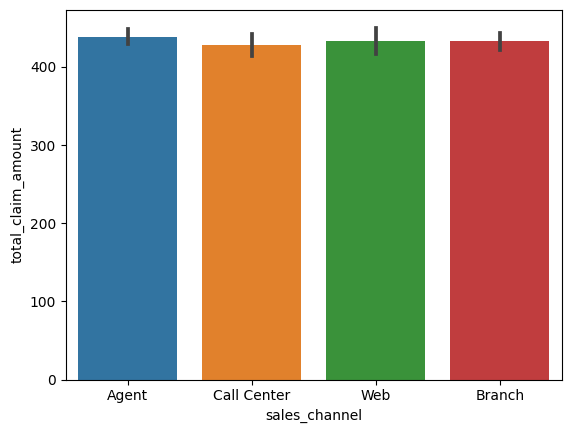

vehicle_class


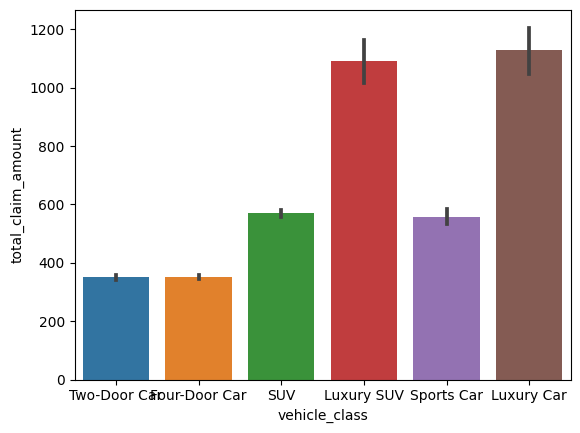

vehicle_size


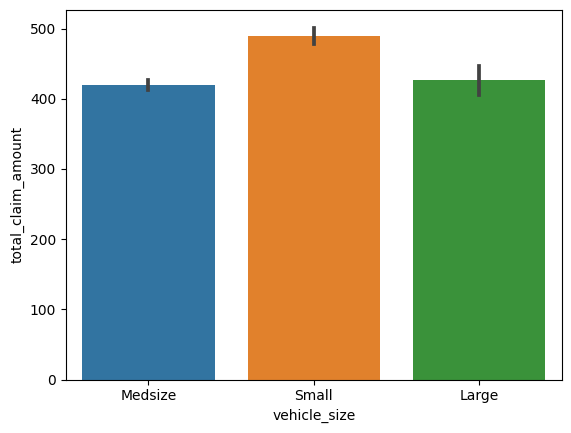

In [ ]:
for col in categoricals:
    print(col)
    sns.barplot(data=customer_df, x=col, y='total_claim_amount')
    plt.show()

In [ ]:
customer_df = customer_df.drop(['response','policy_type','policy','sales_channel'],axis=1)
customer_df.head()

,state,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Offer3,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Offer1,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car,Medsize


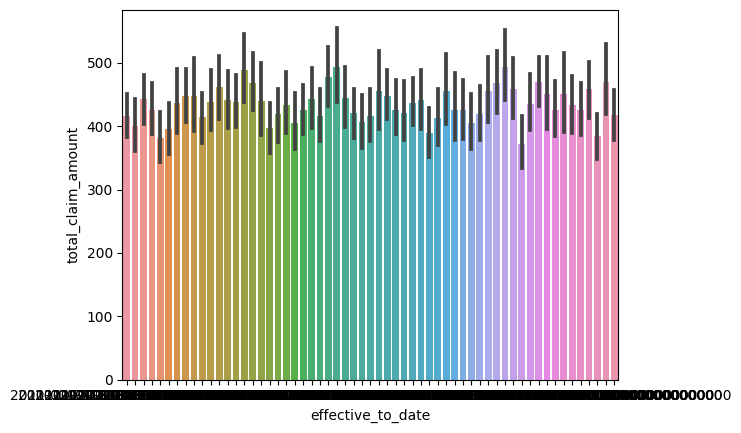

In [ ]:
sns.barplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
plt.show()

customer_lifetime_value


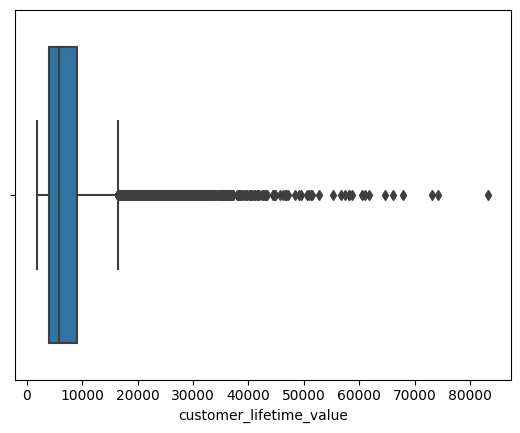

income


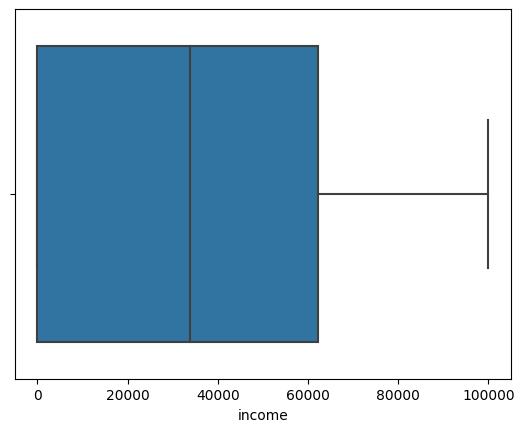

monthly_premium_auto


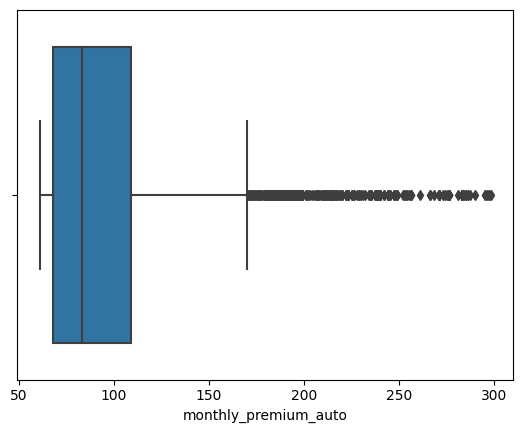

months_since_last_claim


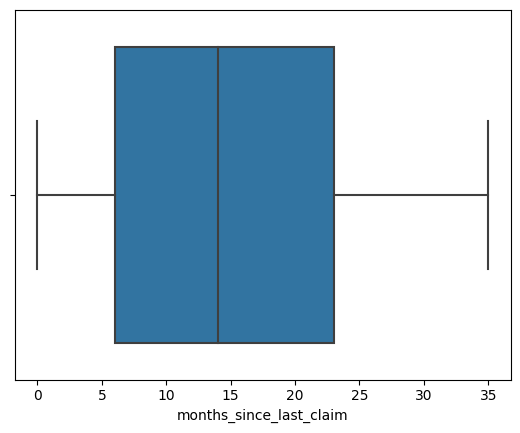

months_since_policy_inception


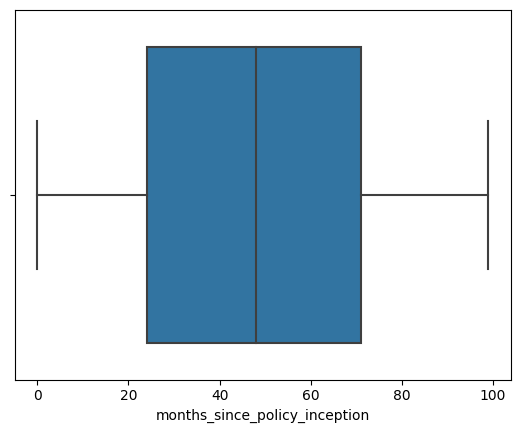

number_of_open_complaints


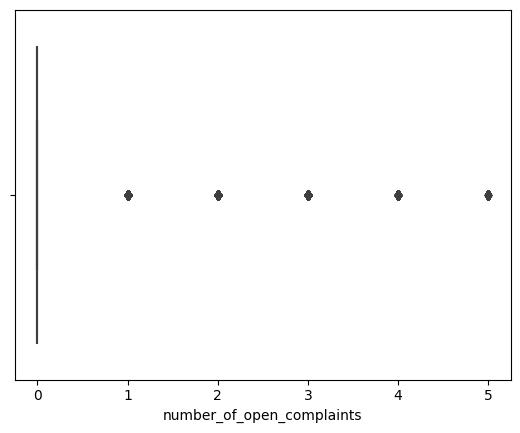

number_of_policies


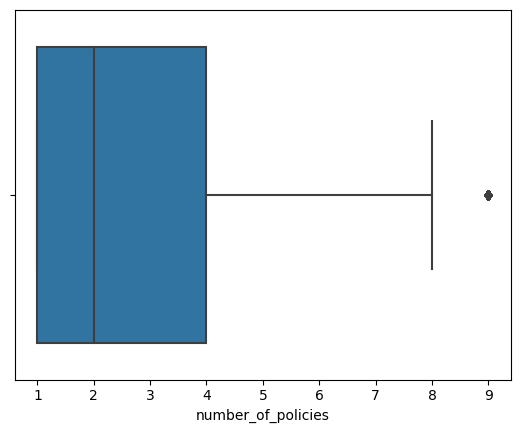

total_claim_amount


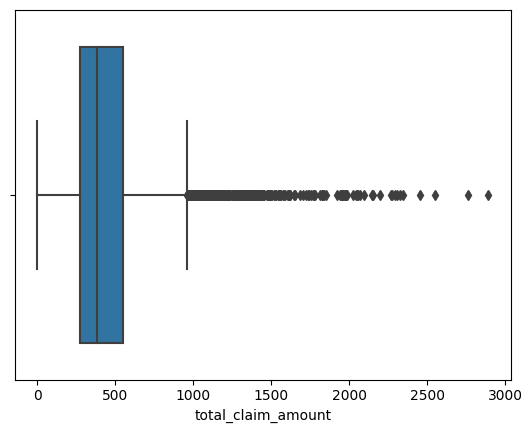

In [ ]:
customer_df_num = customer_df.select_dtypes(np.number)
for col in customer_df_num.columns:
    print(col)
    sns.boxplot(x=customer_df_num[col])
    plt.show()

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q3 = np.quantile(df[col], 0.75)
        Q1 = np.quantile(df[col], 0.25)
        IQR = Q3 - Q1
        upper_range = Q3 + 1.5 * IQR

        df = df[customer_df[col] < upper_range]
        df.reset_index(drop=True, inplace=True)
    return df

customer_df = remove_outliers(customer_df, ["customer_lifetime_value","monthly_premium_auto","number_of_policies","total_claim_amount"])
customer_df.shape


<ipython-input-15-5a7e4bb3650a>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[customer_df[col] < upper_range]


(7153, 19)

In [ ]:
df_wrang = customer_df.copy()
df_wrang.head()

,state,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car,Medsize
1,Nevada,12887.431650,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car,Medsize
2,California,7645.861827,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Offer1,529.881344,SUV,Medsize
3,Washington,2813.692575,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car,Medsize
4,Oregon,8256.297800,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Offer2,159.383042,Two-Door Car,Medsize


In [ ]:
x = df_wrang.drop(['total_claim_amount'], axis=1)
y = df_wrang['total_claim_amount']

In [ ]:
x_num = x.select_dtypes(np.number)

scaler = StandardScaler()
scaler.fit(x_num)

x_num_scaled = scaler.transform(x_num)
x_num_scaled = pd.DataFrame(x_num_scaled, columns = x_num.columns)
x_num_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-1.081641,0.599678,-0.707717,1.685692,-1.539933,-0.423692,-0.826167
1,2.028163,0.353246,0.549845,0.292342,-0.355972,-0.423692,-0.418639
2,0.418088,-1.247627,0.485355,0.292342,0.612723,-0.423692,1.619005
3,-1.066229,0.191376,-0.578736,-0.304808,-0.140707,-0.423692,-0.826167
4,0.605598,0.817255,-0.707717,-0.105758,1.653173,-0.423692,-0.418639
...,...,...,...,...,...,...,...
7148,-0.670986,0.320222,0.420864,0.093292,0.361580,-0.423692,-0.826167
7149,-0.979354,-0.538433,-0.385265,-0.105758,-0.714748,-0.423692,-0.826167
7150,0.577213,-1.247627,-0.191794,-0.603383,-0.391850,2.793577,-0.418639
7151,0.380791,-0.527371,0.162903,1.884742,-1.611688,-0.423692,-0.011110


In [ ]:
x_cat = x.select_dtypes('object')
x_cat.columns

Index(['state', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'renew_offer_type', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [ ]:

x_cat_ordinal = x_cat[["coverage","employmentstatus","location_code","vehicle_size"]].copy()

x_cat_ordinal["coverage"] = x_cat_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
x_cat_ordinal["employmentstatus"] = x_cat_ordinal["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
x_cat_ordinal["location_code"] = x_cat_ordinal["location_code"].map({"Suburban" : 0, "Urban" : 1, "Rural" : 2})
x_cat_ordinal["vehicle_size"] = x_cat_ordinal["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [ ]:
x_cat_onehot = x_cat.drop(["coverage","employmentstatus","location_code","vehicle_size"],axis=1)

encoder = OneHotEncoder(drop='first')
encoder.fit(x_cat_onehot)

cols = []
for i in range(len(encoder.categories_)):
    cols += list(encoder.categories_[i])[1:]

og_cols = len(x_cat_onehot.columns)
x_cat_onehot[cols] = encoder.transform(x_cat_onehot).todense()
x_cat_onehot = x_cat_onehot.drop(x_cat_onehot.columns[:og_cols], axis=1)


In [ ]:
x_concat = pd.concat([x_num_scaled, x_cat_onehot, x_cat_ordinal], axis=1)


In [ ]:

x_concat.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'California',
       'Nevada', 'Oregon', 'Washington', 'College', 'Doctor',
       'High School or Below', 'Master', 'M', 'Married', 'Single', 'Offer2',
       'Offer3', 'Offer4', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car', 'coverage', 'employmentstatus', 'location_code',
       'vehicle_size'],
      dtype='object')

In [ ]:
x_concat['eff_to_day'] = x['effective_to_date'].dt.day
x_concat['eff_to_week'] = x['effective_to_date'].dt.week
x_concat['eff_to_month'] = x['effective_to_date'].dt.month
x_concat['eff_to_day'], x_concat['eff_to_week'], x_concat['eff_to_month']

<ipython-input-24-144255f58490>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  x_concat['eff_to_week'] = x['effective_to_date'].dt.week


(0       24
 1       19
 2       20
 3        3
 4       25
         ..
 7148     6
 7149    12
 7150     6
 7151     3
 7152    14
 Name: eff_to_day, Length: 7153, dtype: int64,
 0       8
 1       7
 2       3
 3       5
 4       4
        ..
 7148    1
 7149    6
 7150    5
 7151    5
 7152    7
 Name: eff_to_week, Length: 7153, dtype: int64,
 0       2
 1       2
 2       1
 3       2
 4       1
        ..
 7148    1
 7149    2
 7150    2
 7151    2
 7152    2
 Name: eff_to_month, Length: 7153, dtype: int64)

In [ ]:

x_concat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,Washington,College,Doctor,High School or Below,Master,M,Married,Single,Offer2,Offer3,Offer4,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,coverage,employmentstatus,location_code,vehicle_size,eff_to_day,eff_to_week,eff_to_month
0,-1.081641,0.599678,-0.707717,1.685692,-1.539933,-0.423692,-0.826167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,24,8,2
1,2.028163,0.353246,0.549845,0.292342,-0.355972,-0.423692,-0.418639,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,0,0,19,7,2
2,0.418088,-1.247627,0.485355,0.292342,0.612723,-0.423692,1.619005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,20,3,1
3,-1.066229,0.191376,-0.578736,-0.304808,-0.140707,-0.423692,-0.826167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0,3,5,2
4,0.605598,0.817255,-0.707717,-0.105758,1.653173,-0.423692,-0.418639,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,2,0,25,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,-0.670986,0.320222,0.420864,0.093292,0.361580,-0.423692,-0.826167,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,2,6,1,1
7149,-0.979354,-0.538433,-0.385265,-0.105758,-0.714748,-0.423692,-0.826167,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,12,6,2
7150,0.577213,-1.247627,-0.191794,-0.603383,-0.391850,2.793577,-0.418639,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,6,5,2
7151,0.380791,-0.527371,0.162903,1.884742,-1.611688,-0.423692,-0.011110,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2,3,5,2


### **1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.**

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x_concat, y, test_size=0.3, random_state=42)

### **2. Try a simple linear regression with all the data to see whether we are getting good results.**

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

print("R2_score:", round(r2_score(y_test, predictions), 2))
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

R2_score: 0.77
MSE: 17788.321067363046
RMSE: 133.3728648090122
MAE: 95.95858768592045


### **3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.**

In [ ]:
def pick_model(model_list, x_train, y_train, x_test):
    for model_name in model_list:
        model = model_name
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        print(model_name)
        print("R2_score:", round(r2_score(y_test, predictions), 2))
        mse = mean_squared_error(y_test, predictions)
        print("MSE:", mse)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        print("RMSE:", rmse)
        mae = mean_absolute_error(y_test, predictions)
        print("MAE:", mae)
        print()

### **4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.**

In [ ]:
pick_model([LinearRegression(), KNeighborsRegressor(n_neighbors=2)], x_train, y_train, x_test)

LinearRegression()
R2_score: 0.77
MSE: 17788.321067363046
RMSE: 133.3728648090122
MAE: 95.95858768592045

KNeighborsRegressor(n_neighbors=2)
R2_score: 0.61
MSE: 30541.42743422012
RMSE: 174.76105811713353
MAE: 116.18829454496738



### **5. You can check also the `MLPRegressor` for this task!**

In [ ]:
pick_model([MLPRegressor(random_state=42, max_iter=1000)], x_train, y_train, x_test)

MLPRegressor(max_iter=1000, random_state=42)
R2_score: 0.83
MSE: 13385.663956174174
RMSE: 115.696430179043
MAE: 78.76936153882549



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


##**6. Check and discuss the results.**


Among the three models that have been developed, the MLPRegressor model stands out as it achieves the highest R2 score. This high R2 score suggests that the model provides more accurate predictions. Additionally, the MLPRegressor model also demonstrates the lowest Mean Absolute Error (MAE) as well as the lowest Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) values. These lower MAE, MSE, and RMSE values indicate that the model's predictions have a smaller margin of error, further highlighting its precision and effectiveness in making accurate predictions.